In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
сustomers = pd.read_csv('olist_customers_dataset.csv', sep=',')

In [3]:
сustomers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders = pd.read_csv('olist_order_items_dataset.csv', sep=',')
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
statuses = pd.read_csv('olist_orders_dataset.csv', sep=',')
statuses.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Сколько у нас пользователей, которые совершили покупку только один раз?

In [6]:
purchases = сustomers.merge(statuses, on = 'customer_id')
purchases.head()
# Объединим датафреймы сustomers и statuses, чтобы посмотреть количество совершенных покупок пользователями

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [7]:
purchases.shape
# Посмотрим размер данных

(99441, 12)

In [8]:
purchases.dtypes
# Тип данных

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
purchases.isna().sum()
# Проверим пропущенные значения 

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
purchases.query('order_status == "delivered"').isna().sum()
# Проверим пропущенные значения у заказов со статусом доставлен
# У 14-ти заказов нет времени подтверждения оплаты, у 2-ух - времени передеачи в лог-ую службу, у 8-ми - времени доставки.

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [11]:
purchases.query('order_status == "delivered" and order_approved_at.notnull() and order_delivered_customer_date.notnull() \
and order_delivered_carrier_date.notnull()') \
.groupby('customer_unique_id') \
.agg({'order_id':'count'}) \
.query('order_id == 1') \
.order_id.sum()

90536

# 90536 уникальных пользователей совершили только одну покупку.

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [12]:
orders_and_statuses = statuses.query("order_status != 'delivered' and order_delivered_customer_date.isna()")
orders_and_statuses
#Делаем фильтрацию по статусу заказа - не равно доставлен, и отсутствию значения в колонке время доставки.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [13]:
orders_and_statuses.order_id.nunique()
# Прверим - нет ли повторяющихся значений order_id

2957

In [14]:
status = orders_and_statuses.groupby('order_status', as_index = False) \
.agg({'order_id':'count'})
status['percent'] = (status.order_id/status.order_id.sum()*100).round(2)
status
# Посмотрим, сколько у нас всего недоставленных заказов по количеству и по доле от общей суммы в % с разбивкой по статусу.

,order_status,order_id,percent
0,approved,2,0.07
1,canceled,619,20.93
2,created,5,0.17
3,invoiced,314,10.62
4,processing,301,10.18
5,shipped,1107,37.44
6,unavailable,609,20.60


In [15]:
orders_and_statuses.dtypes
# Проверим тип данных в колонках со временем

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [16]:
orders_and_statuses['order_estimated_delivery_date'] = pd.to_datetime(orders_and_statuses['order_estimated_delivery_date'])
orders_and_statuses['order_purchase_timestamp'] = pd.to_datetime(orders_and_statuses['order_purchase_timestamp'])
orders_and_statuses['order_approved_at'] = pd.to_datetime(orders_and_statuses['order_approved_at'])
orders_and_statuses['order_delivered_carrier_date'] = pd.to_datetime(orders_and_statuses['order_delivered_carrier_date'])
orders_and_statuses['order_delivered_customer_date'] = pd.to_datetime(orders_and_statuses['order_delivered_customer_date'])
# Приведем данные в колонках со временем к формату datetime

In [17]:
orders_and_statuses['year'] = orders_and_statuses['order_estimated_delivery_date'].dt.year
orders_and_statuses['month'] = orders_and_statuses['order_estimated_delivery_date'].dt.month
# Создадим новые колонки с данными "год" и "месяц" для подсчета количества месяцев в датасете

In [18]:
# Посмотрим, сколько всего месяцев в наших данных
# Для этого возьмем данные из исходного датафейма, чтобы посмотреть кол-во месяцев, где есть значения 
# в колонке с обещанной датой доставки
month = statuses
month['order_estimated_delivery_date'] = pd.to_datetime(month['order_estimated_delivery_date'])
month['year'] = month['order_estimated_delivery_date'].dt.year
month['month'] = month['order_estimated_delivery_date'].dt.month
month.groupby(['year', 'month'], as_index = False) \
.agg({'order_id':'count'}) \
.shape
# 27 месяцев

(27, 3)

In [19]:
# Посчитаес для каждого отдельного статуса количество недоставленных заказов
# И посчитаем их среднее кол-во  в месяц:
status_mean = orders_and_statuses.groupby('order_status', as_index = False)\
.agg({'order_id':'count'})
status_mean['mean'] = status_mean.order_id/27
status_mean

,order_status,order_id,mean
0,approved,2,0.074074
1,canceled,619,22.925926
2,created,5,0.185185
3,invoiced,314,11.629630
4,processing,301,11.148148
5,shipped,1107,41.000000
6,unavailable,609,22.555556


In [20]:
grafic = orders_and_statuses.groupby(['year', 'month','order_status'], as_index = False) \
.agg({'order_id':'count'})

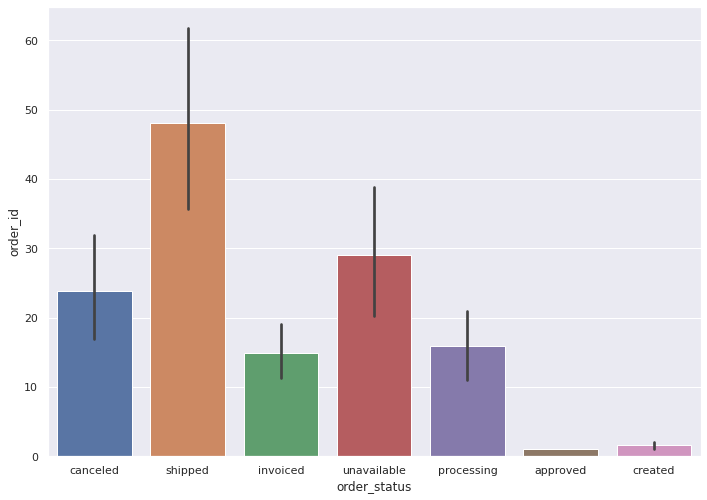

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=grafic, x="order_status", y="order_id")

# Посмотрим на графике распределение надоставленных заказов в разбивке по статусам
# Большинство недоставленных заказов (~37% от общего числа недоставленных, 41 шт в среднем в месяц) со статусом 'shipped'.

In [22]:
orders_and_statuses.query('order_status == "shipped"').isna().sum()
#Посмотрим пропущенные значения для заказов со статусом "shipped".

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
year                                0
month                               0
dtype: int64

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [23]:
products = orders.merge(statuses, on = 'order_id')
products.head()
# Объединим датафреймы orders и statuses

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017,5
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018,2
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017,3


In [24]:
products.product_id.nunique()
# Посмотрим, сколько всего уникальных тотваров

32951

In [25]:
products['order_purchase_timestamp'] = pd.to_datetime(products['order_purchase_timestamp'])
# Сделаем колонку со временем создания заказа типа datetime

In [26]:
products['weekday'] = products['order_purchase_timestamp'].dt.day_name()
# Создадим новую колонку со значениями день недели

In [27]:
products.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017,9,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017,5,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018,2,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018,8,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017,3,Saturday


In [28]:
df_weekday = products.query('order_status == "delivered" and order_approved_at.notnull() and order_delivered_customer_date.notnull() \
and order_delivered_carrier_date.notnull()') \
.groupby(['product_id', 'weekday'], as_index = False) \
.agg({'order_item_id':'count'})
# Создадим новый датафрейм, чтобы посмотреть для каждого товара и дня недели - сколько раз он покупался.
# Применим фильтр из первого задания, так как покупкой мы считаем доставленный, оплаченный товар с наличием значений 
# во всех колонках со временем


In [29]:
df_weekday

,product_id,weekday,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
59934,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
59935,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
59936,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
59937,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [30]:
df_weekday.query('product_id == "fffdb2d0ec8d6a61f0a0a0db3f25b441"')
# Посмотрим на примере одного товара, сколько раз он покупался в разные дни недели.
# Во вторник данный товар покупался максимальное кол-во раз.

,product_id,weekday,order_item_id
59934,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
59935,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
59936,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
59937,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [31]:
df_weekday.order_item_id.max()
# Посмотрим максимальное количество покупок одного товара.
# Максимальное количество покупок какого-то товара - 93

93

In [32]:
df_weekday.query('order_item_id == "93"')
# 93 раза его купили в среду

,product_id,weekday,order_item_id
15592,422879e10f46682990de24d770e7f83d,Wednesday,93


In [33]:
# Создадим дф с днем недели для кажого товара, в который его купили максимальное кол-во раз.
max_purs_product = df_weekday.groupby('product_id', as_index = False)['weekday'] \
.agg({'order_item_id':'max'})
max_purs_product

,product_id,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Wednesday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32205,fff6177642830a9a94a0f2cba5e476d1,Sunday
32206,fff81cc3158d2725c0655ab9ba0f712c,Monday
32207,fff9553ac224cec9d15d49f5a263411f,Friday
32208,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [34]:
customers_and_statuses = сustomers.merge(statuses, on = 'customer_id')
# Объединим cuctomers and statuses

In [35]:
customers_and_statuses

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,6
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,2
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,6
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,4
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,2018,4
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,2018,4
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,2018,5
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,2017,12


In [36]:
duplicateRows = customers_and_statuses[customers_and_statuses.duplicated ()]
duplicateRows
# Проверим на наличие дубликатов

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month


In [37]:
customers_and_statuses.isna().sum()
# И на наличие пропущенных значений 

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
year                                0
month                               0
dtype: int64

In [38]:
customers_and_statuses = customers_and_statuses.query('order_status == "delivered" and order_approved_at.notnull() and order_delivered_customer_date.notnull() \
and order_delivered_carrier_date.notnull()')
# Применим уже знакомые фильтры, чтобы оставить в датафрейме только купленные товары

In [39]:
customers_and_statuses.drop(customers_and_statuses.columns[[0, 2, 3, 4, 6, 8, 9, 10, 11, 12]], axis = 1, inplace=True)
# Удалим ненужные колонки 

In [40]:
customers_and_statuses['order_purchase_timestamp'] = pd.to_datetime(customers_and_statuses['order_purchase_timestamp'])
# День покупки будем считать день создания заказа, приведем колонку с этими данными к типу datetime

In [41]:
customers_and_statuses['month'] = customers_and_statuses['order_purchase_timestamp'].dt.month
customers_and_statuses['year'] = customers_and_statuses['order_purchase_timestamp'].dt.year
# Создадим новые колонки "месяц" и "год"

In [42]:
customers_and_statuses['days'] = customers_and_statuses['order_purchase_timestamp'].dt.days_in_month
#Создадим новую колонку с количеством дней в заданном месяце, чтобы далее посчитать кол-во недель в этом месяце

In [43]:
customers_and_statuses['weeks'] = (customers_and_statuses['days']/7).round(2)
# Создадим новую колонку с количеством недель

In [44]:
customers_and_statuses

,customer_unique_id,order_id,order_purchase_timestamp,month,year,days,weeks
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,5,2017,31,4.43
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,2018,31,4.43
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5,2018,31,4.43
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,3,2018,31,4.43
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,7,2018,31,4.43
...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,4,2018,30,4.29
99437,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,4,2018,30,4.29
99438,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,4,2018,30,4.29
99439,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,11,2017,30,4.29


In [45]:
df_purshape = customers_and_statuses.groupby(['customer_unique_id','year', 'month', 'weeks'], as_index = False) \
.agg({'order_id': 'count'})
# Сделаем новый дф с группировкой по уник-му айди покупателя, году-месяцу-кол-ву недель в месяце 
# и посчитаем для каждого количество покупок

In [46]:
df_purshape['mean'] = (df_purshape['order_id']/df_purshape['weeks']).round(2)
# Создадим новую колонку, где посчитаем среднее кол-во заказов для каждого пользователя в каждом месяце

In [47]:
df_purshape

,customer_unique_id,year,month,weeks,order_id,mean
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017,3,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017,11,4.29,1,0.23
...,...,...,...,...,...,...
95166,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,4.29,1,0.23
95167,fffea47cd6d3cc0a88bd621562a9d061,2017,12,4.43,1,0.23
95168,ffff371b4d645b6ecea244b27531430a,2017,2,4.00,1,0.25
95169,ffff5962728ec6157033ef9805bacc48,2018,5,4.43,1,0.23


In [48]:
df_purshape.query('customer_unique_id == "c8460e4251689ba205045f3ea17884a1"')
# Посмотрим среднее для какого-то клиента
# в августе 2018 он сделал 4 заказа, в среднем в неделю для этого месяца - это 0.9 заказов.

,customer_unique_id,year,month,weeks,order_id,mean
74543,c8460e4251689ba205045f3ea17884a1,2018,8,4.43,4,0.9


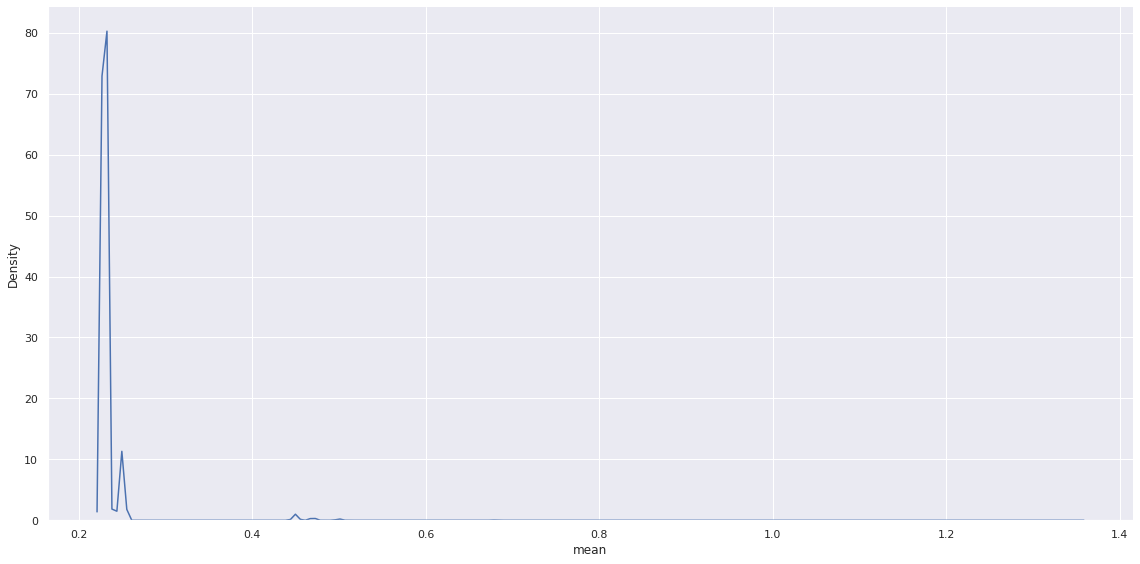

In [49]:

sns.displot(data=df_purshape, x="mean", kind="kde", height=8, aspect=2)
# Посмотрим на графике распределение у пользоватедей количества средних покупок в неделю по месяцам
# Большинство пользователей в среднем совершали не болле 1 покупки в неделю.

In [50]:
df_purshape.query('mean > 1') \
.customer_unique_id.nunique()
#Всего 1 уник-ый пользователm совершил в среднем в неделю больше 1 покупки.

1

# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

In [51]:
df_cust_stat = сustomers.merge(statuses, on = 'customer_id')
# Объединим сustomers и statuses

In [52]:
df_cust_stat = df_cust_stat.query('order_status == "delivered" and order_approved_at.notnull() and order_delivered_customer_date.notnull() \
and order_delivered_carrier_date.notnull()')
# Применим всё те же фильтры, чтобы оставить в датафрейме только купленные товары

In [53]:
df_cust_stat.drop(df_cust_stat.columns[[0, 2,3, 4, 6, 8, 9, 10, 11]], axis = 1, inplace=True)
# Удалим ненужные колонки

In [54]:
df_cust_stat['order_purchase_timestamp'] = pd.to_datetime(df_cust_stat['order_purchase_timestamp'])
# приведем колонку order_purchase_timestamp к типу datetime

In [55]:
df_cust_stat['year_month'] = df_cust_stat['order_purchase_timestamp'].dt.to_period("M").astype(int)

# Создадим новую колонку год-месяц покупки и приведем к типу int для дальнейщего расчета дельты

In [56]:
df_cust_stat["first_purсh"] = df_cust_stat.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')
# Cоздадим новую колонку с датой первой покупки 

In [57]:
df_cust_stat['month_first_purсh'] = pd.to_datetime(df_cust_stat["first_purсh"]).dt.month
# Cоздадим новую колонку с номером месяца первой покупки пользователя

In [58]:
df_cust_stat['year_month_first_purсh'] = df_cust_stat['first_purсh'].dt.to_period("M").astype(int)

# Cоздадим новую колонку с периодом (год-месяц) первой покупки пользователя и приведем к типу int для дальнейщего расчета дельты

In [59]:
df_cust_stat = df_cust_stat.query(' "2017-01-01" <= first_purсh <= "2017-12-31"')
# Оставим для анализа данные по пользователем, у которых первая покупка была совершена не ранее января и не позднее декабря 2017

In [60]:
df_cust_stat = df_cust_stat.query('order_purchase_timestamp <= "2018-02-28"')
# Также оставим данные о повторных покупках не позже февраля 2018 (третий месяц от декабря 2017)

In [61]:
df_cust_stat.head()

,customer_unique_id,order_id,order_purchase_timestamp,year,month,year_month,first_purсh,month_first_purсh,year_month_first_purсh
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017,6,568,2017-05-16 15:05:35,5,568
5,4c93744516667ad3b8f1fb645a3116a4,5741ea1f91b5fbab2bd2dc653a5b5099,2017-09-14 18:14:31,2017,10,572,2017-09-14 18:14:31,9,572
7,57b2a98a409812fe9618067b6b8ebe4f,1093c8304c7a003280dd34598194913d,2017-11-16 19:29:02,2017,12,574,2017-11-16 19:29:02,11,574
10,2a7745e1ed516b289ed9b29c7d0539a5,8428e578bb1cf839ae26a6b7615502b9,2017-11-27 17:23:20,2017,12,574,2017-11-27 17:23:20,11,574
12,918dc87cd72cd9f6ed4bd442ed785235,83d8f70418eefd96f37b483dff430305,2017-09-09 09:54:57,2017,10,572,2017-09-09 09:54:57,9,572


In [62]:
month_first = df_cust_stat.groupby(['month_first_purсh', 'year_month_first_purсh', 'year_month'], as_index = False) \
.agg({'customer_unique_id':'nunique'})
month_first.head()
# Сгруппируем данные по месяцу первой покупки, и по значениям для подсчета дельты
# и посчитаем сколько уникальных пользователей сделали заказ

,month_first_purсh,year_month_first_purсh,year_month,customer_unique_id
0,1,564,564,715
1,1,564,565,2
2,1,564,566,2
3,1,564,567,1
4,1,564,568,3


In [63]:
month_first['period'] = (month_first.year_month - month_first.year_month_first_purсh)
# Добавим колонку период, чтобы видеть на какой месяц от первой покупки, был сделан повторный заказ

In [64]:
month_first

,month_first_purсh,year_month_first_purсh,year_month,customer_unique_id,period
0,1,564,564,715,0
1,1,564,565,2,1
2,1,564,566,2,2
3,1,564,567,1,3
4,1,564,568,3,4
...,...,...,...,...,...
96,11,574,576,26,2
97,11,574,577,11,3
98,12,575,575,5268,0
99,12,575,576,11,1


In [65]:
periods = month_first.pivot(index='month_first_purсh', columns = 'period', values = 'customer_unique_id')
periods = periods.reset_index()
periods
# Сделаем сводную таблицу

period,month_first_purсh,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,715.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0
1,2,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,NaN
2,3,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,NaN,NaN
3,4,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,NaN,NaN,NaN
4,5,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,8.0,NaN,NaN,NaN,NaN
5,6,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
6,7,3752.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,4003.0,28.0,22.0,11.0,18.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,4329.0,31.0,11.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
periods['ret'] = periods[2]/periods[0]

# Добавим колонку ret со значением retention (поделим кол-во ун-ых пользователей совершивших 
# повторную покупку на третий месяц на кол-во пол-ей, совершивших покупку впревые)

In [67]:
periods

period,month_first_purсh,0,1,2,3,4,5,6,7,8,9,10,11,12,13,ret
0,1,715.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,0.002797
1,2,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,NaN,0.003094
2,3,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,NaN,NaN,0.003596
3,4,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,NaN,NaN,NaN,0.002216
4,5,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,8.0,NaN,NaN,NaN,NaN,0.004638
5,6,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,0.003951
6,7,3752.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.003465
7,8,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003451
8,9,4003.0,28.0,22.0,11.0,18.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005496
9,10,4329.0,31.0,11.0,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002541


In [68]:
periods.ret.max()

0.005495878091431427

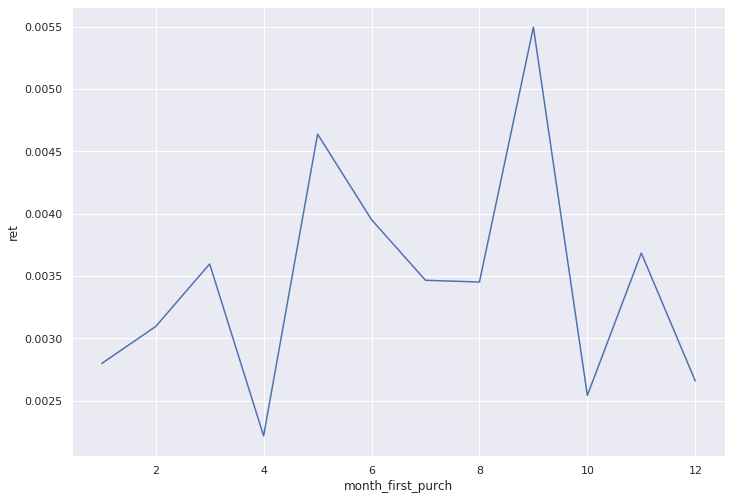

In [69]:
sns.lineplot(data=periods, x="month_first_purсh", y = 'ret')

# На графике можно посмотреть изменение retention по месяцам
# Самые низкие значения наблюдаются в  январе, апреле, октябре и декабре; самые высокие - марте, мае, сентябре и ноябре

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [70]:
df_6 = сustomers.merge(statuses, on = 'customer_id')
# Объединим все три датафрейма

In [71]:
cohort = df_6.merge(orders, on = 'order_id')

In [72]:
cohort = cohort.query('order_status == "delivered" and order_approved_at.notnull() and order_delivered_customer_date.notnull() \
and order_delivered_carrier_date.notnull()')
# Применим фильтры, чтобы оставить в датафрейме только купленные товары

In [73]:
cohort.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,6,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,2,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,6,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,4,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,8,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [74]:
duplicateRows = cohort[cohort.duplicated ()]
duplicateRows
# Проверим на наличие дубликатов

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [75]:
cohort.isna().sum()
# Проверим пропущенные значения

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
month                            0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [76]:
cohort.drop(cohort.columns[[0, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17]], axis = 1, inplace=True)
# Удалим ненужные колонки

In [77]:
cohort.order_purchase_timestamp = pd.to_datetime(cohort.order_purchase_timestamp)
# Приведем колонку order_purchase_timestamp к формату dt

In [78]:
cohort.order_purchase_timestamp.max()
# Посмтрим, когда был сделан последний доставленный заказ.
# 2018-08-29

# За "текущую" (отчетную) дату возьмем 2018-09-01 (след-ий месяц после последней покупки)

Timestamp('2018-08-29 15:00:37')

In [79]:
cohort['report_date'] = '2018-09-01 23:59:59'
cohort.report_date = pd.to_datetime(cohort.report_date)
# Создадим колонку с одинаковым значением - отчетной датой, чтобы потом получить значение дельты.

In [80]:
cohort['last_purch'] = cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')
# Создадим колонку с датой последней покупки пользователя

In [81]:
cohort['Recency'] = (cohort['report_date'] - cohort['last_purch']).dt.days
# Создадим колонку с количеством дней от даты последней покупки до отчетной даты.

In [82]:
cohort_r = cohort.groupby('customer_unique_id', as_index = False) \
.agg({'Recency':'max'})
cohort_r
# Сделаем дф для дальнейшего подсчета квантилей для Recency

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,114
1,0000b849f77a49e4a4ce2b2a4ca5be3f,117
2,0000f46a3911fa3c0805444483337064,540
3,0000f6ccb0745a6a4b88665a16c9f078,324
4,0004aac84e0df4da2b147fca70cf8255,291
...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,450
93332,fffea47cd6d3cc0a88bd621562a9d061,265
93333,ffff371b4d645b6ecea244b27531430a,571
93334,ffff5962728ec6157033ef9805bacc48,122


In [83]:
cohort_r.Recency.min()
# Посмотрим минимальное и максимальное значение

3

In [84]:
cohort_r.Recency.max()

716

In [85]:
cohort_r.Recency.quantile(q=[0.2, 0.4, 0.6, 0.8])
# С помощью квантилей определим границы для 5 категорий
# 1   385 - 716
# 2   271 - 384
# 3   180 - 270
# 4   95 - 179
# 5     3 - 94

0.2     95.0
0.4    180.0
0.6    271.0
0.8    385.0
Name: Recency, dtype: float64

In [86]:
def r(x):
    if x < 95:
        return 5
    elif 95 <= x < 180:
        return 4
    elif 180 <= x < 271:
        return 3
    elif 271 <= x < 385:
        return 2
    else:
        return 1
   # Напишем фунцию, чтобы заполнить новую колонку  R сегментами в зависимости от значений в колонке delta_purсh

In [87]:
cohort['R'] = cohort['Recency'].apply(r)
# Создадим колонку со значениями R-сегмента

In [88]:
cohort['Frequency'] = cohort.groupby('customer_unique_id')['order_id'].transform('nunique')
# Создадим новую колонку с количеством покупок (уникальных заказов) для каждого пользователя

In [89]:
cohort.Frequency.min()
# Посмотрим минимальное и максимальное значение

1

In [90]:
cohort.Frequency.max()

15

In [91]:
cohort.Frequency.quantile(q=[0.2, 0.4, 0.6, 0.8])
# С помощью квантилей определим границы для 5 категорий


0.2    1.0
0.4    1.0
0.6    1.0
0.8    1.0
Name: Frequency, dtype: float64

In [92]:
cohort.groupby('Frequency') \
.agg({'customer_unique_id' : 'nunique'})
# Так как бОльшая часть пользователей сделала не более одного заказа, определим границы другим способом (вручную)

,customer_unique_id
Frequency,
1,90536
2,2572
3,181
4,28
5,9
6,5
7,3
9,1
15,1


In [93]:
def f(x):
    if x >= 7:
        return 5
    elif 5 <= x < 7:
        return 4
    elif 3 <= x < 5:
        return 3
    elif 1 < x < 3:
        return 2
    else:
        return 1
   # Напишем фунцию, чтобы заполнить новую колонку  F сегментами в зависимости от значений в колонке order_sum
# 1   1
# 2   2 
# 3   3 - 4
# 4   5 - 6
# 5   7 - 15

In [94]:
cohort['F'] = cohort['Frequency'].apply(f)
# Создадим колонку со значениями F-сегмента

In [95]:
cohort['Monetary'] = cohort.groupby('customer_unique_id')['price'].transform('sum')
# Создадим новую колонку с суммой покупок для каждого пользователя

In [96]:
cohort_m = cohort.groupby('customer_unique_id', as_index = False) \
.agg({'Monetary':'max'})
cohort_m
# Сделаем дф для дальнейшего подсчета квантилей для Recency

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93332,fffea47cd6d3cc0a88bd621562a9d061,64.89
93333,ffff371b4d645b6ecea244b27531430a,89.90
93334,ffff5962728ec6157033ef9805bacc48,115.00


In [97]:
cohort_m.Monetary.min()

0.85

In [98]:
cohort_m.Monetary.max()

13440.0

In [99]:
cohort_m.Monetary.quantile(q=[0.2, 0.4, 0.6, 0.8])
# С помощью квантилей определим границы для 5 категорий
# 1   0.85 - 39.89
# 2   39.9 - 69.8
# 3   69.9 - 109.8
# 4   109.9 - 179.8
# 5   179.9 - 13440.00

0.2     39.9
0.4     69.9
0.6    109.9
0.8    179.9
Name: Monetary, dtype: float64

In [100]:
def m(x):
    if x >= 179.9:
        return 5
    elif 109.9 <= x < 179.9:
        return 4
    elif 69.9 <= x < 109.9:
        return 3
    elif 39.9 <= x < 69.9:
        return 2
    else:
        return 1
   # Напишем фунцию, чтобы заполнить новую колонку  M сегментами в зависимости от значений в колонке price_sum

In [101]:
cohort['M'] = cohort['Monetary'].apply(m)
# Создадим колонку со значениями M-сегмента

In [102]:
cohort['RFM'] = cohort['R'].map(str)+cohort['F'].map(str)+cohort['M'].map(str)
# Создадим колонку RFM

In [103]:
def s(x):
    if x == '555' or x == '554' or x == '544' or x == '545' or x == '454' or x == '455' or x == '445':   
        return 'Чемпионы'
    if x == '543' or x == '444' or x == '435' or x == '355' or x == '354' or x == '345' or x == '344' or x == '335':
        return 'Постоянные'
    if x == '553' or x == '551' or x == '552' or x == '541' or x == '542' or x == '533' or x == '532' or x == '531' \
    or x == '452' or x == '451' or x == '442' or x == '441' or x == '431' or x == '453' or x == '433' or x == '432' \
    or x == '423' or x == '353' or x == '352' or x == '351' or x == '342' or x == '341' or x == '333' or x == '323':
        return 'Потенциальные постоянные'
    if x == '512' or x == '511' or x == '422' or x == '421' or x == '412' or x == '411' or x == '311':
        return 'Новые'
    if x == '525' or x == '524' or x == '523' or x == '522' or x == '521' or x == '515'or x == '514' or x == '513' \
    or x == '425' or x == '424' or x == '413' or x == '414' or x == '415' or x == '315' or x == '314' or x == '313':
        return 'Перспективные'
    if x == '535' or x == '534' or x == '443' or x == '434' or x == '343' or x == '334' or x == '325' or x == '324':
        return 'Требуют внимания'
    if x == '331' or x == '321' or x == '312' or x == '221' or x == '213' or x == '231' or x == '241' or x == '251':
        return 'Почти уснули'
    if x == '155' or x == '154' or x == '144' or x == '214' or x == '215' or x == '115' or x == '114' or x == '113':
        return 'Нельзя потерять'
    if x == '255' or x == '254' or x == '245' or x == '244' or x == '253' or x == '252' or x == '243' or x == '242' \
    or x == '235' or x == '234' or x == '225' or x == '224' or x == '153' or x == '152' or x == '145' or x == '143' \
    or x == '142' or x == '135' or x == '134' or x == '133' or x == '125' or x == '124':
        return 'Зона риска'
    if x == '332' or x == '322' or x == '233' or x == '232' or x == '223' or x == '222' or x == '132' or x == '123' \
    or x == '122' or x == '212' or x == '211':
        return 'Уснувшие'
    if x == '111' or x == '112' or x == '121' or x == '131' or x == '141' or x == '151':
        return 'Потеряны'
# Напишем функцию, чтобы присвоить сегментам названия

Чемпионы - Покупали недавно, заказывают часто и тратят больше всего.

Постоянные - Стабильно покупающие клиенты; часть из них может стать чемпионами. 

Потенциальные постоянные - Клиенты, которым немного не хватает частоты/суммы покупок, чтобы стать постоянными.

Новые - Купили что-то в первый раз, либо в первый раз за долгое время. 

Перспективные - Клиенты, которым нужно предлагать акции/программы лояльности.

Требуют внимания - Клиенты выше средней недавности, частоты и денежной стоимости.

Почти уснули - Клиенты в этом сегменте не совершали покупки в течение относительно длительного времени, 
но не настолько, чтобы быть недоступными.

Нельзя потерять	- Клиенты, покупающие много и часто, но переставшие это делать. 

Зона риска - Клиенты, похожие на сегмент «Не можем терять», но ее участники недавно совершили покупку.

Уснувшие - Клиенты в этом сегменте не совершали покупки в течение  длительного времени

Потеряны - Этот сегмент имеет самый низкий приоритет.

In [104]:
cohort['Seg'] = cohort['RFM'].apply(s)
# Создадим колонку с названиями сегментов

In [105]:
rfm = cohort.groupby(['customer_unique_id', 'Seg'] , as_index = False) \
.agg({'RFM' : 'max'})
rfm
# Создадим дф с ун-ми значениями customer_unique_id	 и соостветствующими им Seg и RFM (т.к. RFM одинаковый, в агг-ей ф-ии применяю max)

,customer_unique_id,Seg,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,Перспективные,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Новые,411
2,0000f46a3911fa3c0805444483337064,Потеряны,112
3,0000f6ccb0745a6a4b88665a16c9f078,Уснувшие,211
4,0004aac84e0df4da2b147fca70cf8255,Нельзя потерять,215
...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,Нельзя потерять,115
93332,fffea47cd6d3cc0a88bd621562a9d061,Почти уснули,312
93333,ffff371b4d645b6ecea244b27531430a,Нельзя потерять,113
93334,ffff5962728ec6157033ef9805bacc48,Перспективные,414


In [106]:
rfm_group = rfm.groupby('Seg', as_index = False) \
.agg({'customer_unique_id' : 'count'})
rfm_group
# Посмотрим распределение количества пользователей по сегментам.

,Seg,customer_unique_id
0,Зона риска,729
1,Нельзя потерять,17559
2,Новые,18298
3,Перспективные,33321
4,Постоянные,64
5,Потенциальные постоянные,159
6,Потеряны,7745
7,Почти уснули,7147
8,Требуют внимания,514
9,Уснувшие,7786


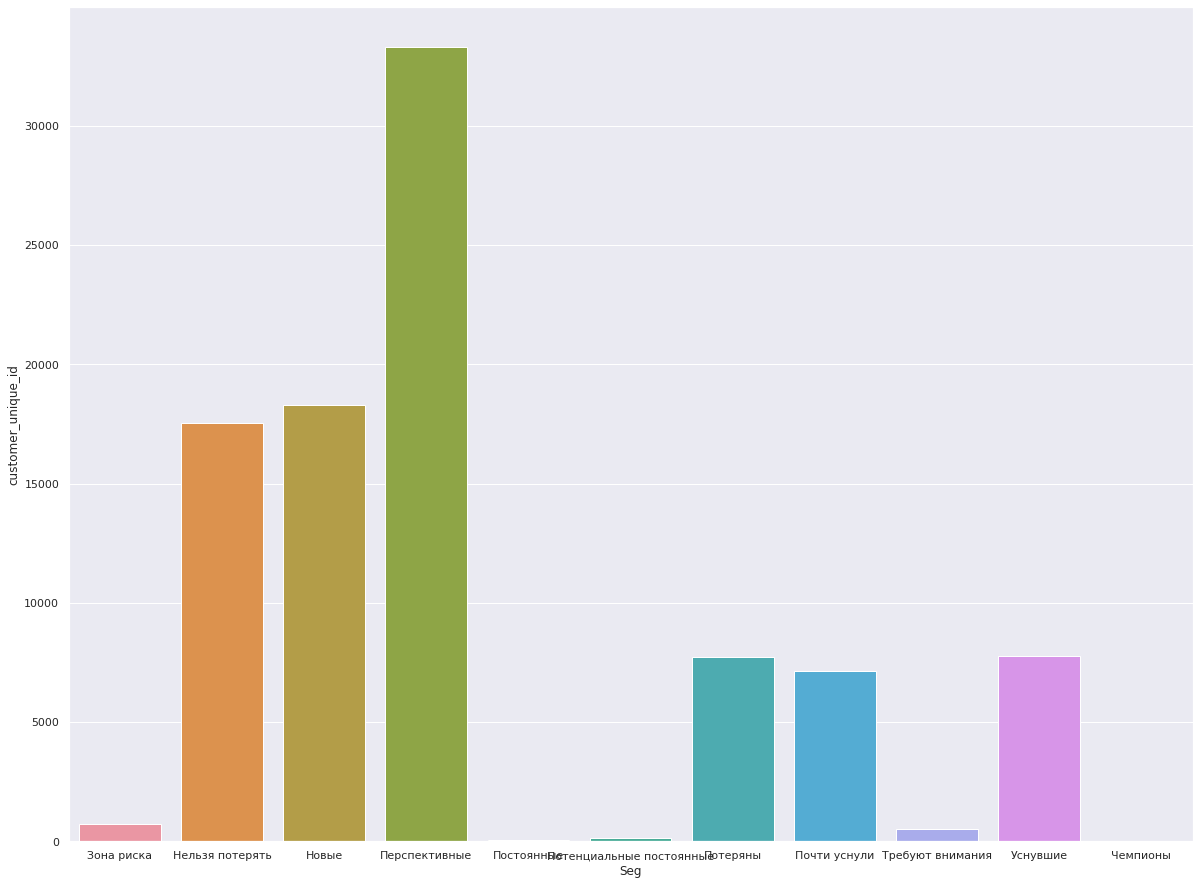

In [107]:
sns.set(rc={'figure.figsize':(20.14,15.35)})
sns.barplot(data=rfm_group, x="Seg", y = 'customer_unique_id')
# Посмотрим распределение клиентов по сегментам на барплоте. 

# БОльшая часть клиентов - это перспективные, новые и требующие возврата/удержания (нельзя потерять).